In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  情感分析

## 1. IMDB影评数据

我们以IMDB情感分析数据集为例，该数据集由Andrew Maas负责维护，可从[斯坦福大学](http://ai.stanford.edu/~amaas/data/sentiment/)或着[fast.ai](http://files.fast.ai/data)处下载。数据集已经分成训练集和测试集，每个各有25000条已标注过的电影评论。其中，负面评论的得分小于等于4，正面评论的得分大于等于7，满分10分。


### Types of data represented as strings
#### Example application: Sentiment analysis of movie reviews

```
.
└── aclImdb
    ├── test
    │   ├── all
    │   ├── neg
    │   └── pos
    │       ├── 0_9.txt
    │       ├── 10022_7.txt
    │           .........     
    └── train
        ├── all
        ├── neg
        ├── pos
        └── unsup

```

在读数据目录时，会自动把`neg`目录里的文本标签设置为0，把pos设置为1.

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("./datasets/aclImdb/train/", categories=['neg', 'pos'])

In [4]:
text_train, y_train = reviews_train.data, reviews_train.target


print("type of text_train: ", type(text_train))
print("length of text_train: ", len(text_train))
print()
print("text_train[6]:\n", text_train[6])

type of text_train:  <class 'list'>
length of text_train:  25000

text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
text_train[6]

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [7]:
np.unique(y_train)

array([0, 1])

情感分析中，通常用来统计训练集中各个类别（标签）的样本数量。

In [8]:
np.bincount(y_train)

array([12500, 12500])

##  2 读取测试数据

In [9]:
reviews_test = load_files("./datasets/aclImdb/test/", categories=['neg', 'pos'])
text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test):", np.bincount(y_test))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


## 3. 影评文本词袋向量

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(text_train)

X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [11]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [12]:
X_test

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3324812 stored elements in Compressed Sparse Row format>

np.prod(X_train.shape) 计算矩阵的总元素数量（行数×列数）

In [13]:
np.sum(X_train > 0) / np.prod(X_train.shape)

np.float64(0.0018336629747892424)

## 4. 对特征的筛选（词袋）

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

0处理

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [16]:
feature_names = vect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]))
print("\nFeatures 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("\nEvery 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02'
 '020410' '029' '03' '04' '041' '05' '050' '06' '06th' '07' '08' '087'
 '089' '08th' '09' '0f' '0ne' '0r' '0s' '10' '100' '1000' '1000000'
 '10000000000000' '1000lb' '1000s' '1001' '100b' '100k' '100m']

Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']

Every 700th feature:
['00' '40s' 'accent' 'aforementioned' 'aloysius' 'annoucing'
 'aristocratic' 'attired' 'bainter' 'bayonets' 'bersen' 'blaze'
 'bookstores' 'brighton' 'bursting' 'capers' 'cbbc' 'chemstrand' 'clad'
 'colin' 'condensing' 'coolidge' 'cray' 'cusp' 'dears' 'dempster'
 'dialing' 'dislocated' 'donnacha' 'duchaussoy' 'eeriest' 'enactment'
 'erupt' 'exoskeleton' 'fare' 'figuring' 'flowing' 'fra

#### 1.词频不低于5

In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)

X_train = vect.transform(text_train)
X_train

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>

In [18]:
feature_names = vect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]))
print("\nFeatures 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("\nEvery 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']

Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']

Every 700th feature:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 

### 2.停用词(Stop-words)

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: ", len(ENGLISH_STOP_WORDS))

print("\nEvery 10th stopword:")
print(list(ENGLISH_STOP_WORDS)[::10])


Number of stop words:  318

Every 10th stopword:
['latterly', 'toward', 'sometimes', 'whereupon', 'us', 'thereby', 'when', 'there', 'has', 'becoming', 'twenty', 'system', 'cry', 'whatever', 'thick', 'nevertheless', 'namely', 'would', 'everyone', 'else', 'me', 'may', 'whither', 'your', 'inc', 'as', 'move', 'therein', 'part', 'perhaps', 'more', 'across']


In [20]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)

X_train = vect.transform(text_train)
X_train

<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>

## 5模型训练

### 词袋

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(), X_train, y_train, n_jobs=4, cv=5, 
                        scoring=["precision","recall"],
                        return_train_score=True)


print(f"train_precision: {np.mean(scores['train_precision']):.4f}, std: {np.std(scores['train_precision']):.4f}")
print(f"train_recall: {np.mean(scores['train_recall']):.4f}, std: {np.std(scores['train_recall']):.4f}")

print(f"test_precision: {np.mean(scores['test_precision']):.4f}, std: {np.std(scores['test_precision']):.4f}")
print(f"test_recall: {np.mean(scores['test_recall']):.4f}, std: {np.std(scores['test_recall']):.4f}")


train_precision: 0.9981, std: 0.0001
train_recall: 0.9979, std: 0.0002
test_precision: 0.8699, std: 0.0046
test_recall: 0.8823, std: 0.0045


添加C正则化，降低模型复杂度

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(C=0.001), X_train, y_train, n_jobs=4, cv=5, 
                        scoring=["precision","recall"],
                        return_train_score=True)


print(f"train_precision: {np.mean(scores['train_precision']):.4f}, std: {np.std(scores['train_precision']):.4f}")
print(f"train_recall: {np.mean(scores['train_recall']):.4f}, std: {np.std(scores['train_recall']):.4f}")

print(f"test_precision: {np.mean(scores['test_precision']):.4f}, std: {np.std(scores['test_precision']):.4f}")
print(f"test_recall: {np.mean(scores['test_recall']):.4f}, std: {np.std(scores['test_recall']):.4f}")

train_precision: 0.8453, std: 0.0014
train_recall: 0.8806, std: 0.0013
test_precision: 0.8302, std: 0.0056
test_recall: 0.8678, std: 0.0050


### TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, stop_words='english', norm='l2')
X_train = vectorizer.fit_transform(text_train)
X_test =  vectorizer.transform(text_test)

In [24]:
model = LogisticRegression(C=0.001)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [25]:
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(C=0.001), X_train, y_train, n_jobs=4, cv=5, 
                        scoring=["precision","recall"],
                        return_train_score=True)


print(f"train_precision: {np.mean(scores['train_precision']):.4f}, std: {np.std(scores['train_precision']):.4f}")
print(f"train_recall: {np.mean(scores['train_recall']):.4f}, std: {np.std(scores['train_recall']):.4f}")

print(f"test_precision: {np.mean(scores['test_precision']):.4f}, std: {np.std(scores['test_precision']):.4f}")
print(f"test_recall: {np.mean(scores['test_recall']):.4f}, std: {np.std(scores['test_recall']):.4f}")

train_precision: 0.7756, std: 0.0021
train_recall: 0.8689, std: 0.0008
test_precision: 0.7643, std: 0.0072
test_recall: 0.8618, std: 0.0057


In [26]:
model.coef_.shape


(1, 26966)

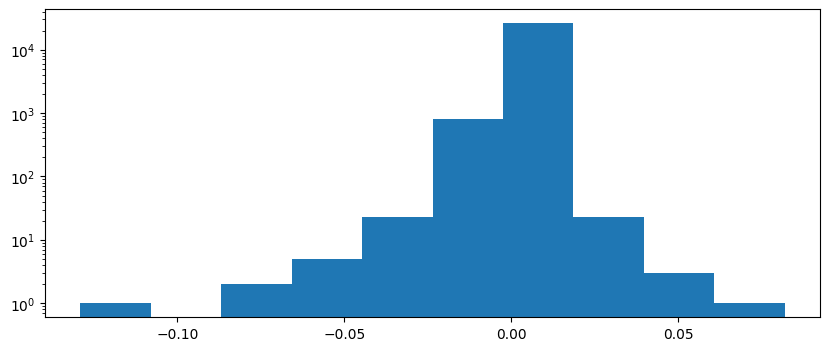

In [27]:
plt.figure(figsize=(10, 4))
plt.hist(model.coef_.ravel(), log=True);

In [28]:
np.array([[0,1,2,3],[4,5,6,7]]).max(axis=0)

array([4, 5, 6, 7])

In [29]:
max_value = X_train.max(axis=0).toarray().ravel()

feature_names = np.array(vectorizer.get_feature_names_out())
sorted_by_tfidf = max_value.argsort()

print("\nFeatures with lowest tfidf:")
print(feature_names[sorted_by_tfidf[:20]])

print("\nFeatures with highest tfidf:")
print(feature_names[sorted_by_tfidf[-20:]])


Features with lowest tfidf:
['suplexes' 'gauche' 'thieving' 'songwriting' 'oversee' 'emerald'
 'cataclysmic' 'ware' 'uphold' 'auspicious' 'coaxing' 'inconsiderate'
 'gliding' 'oncoming' 'galadriel' 'negotiate' 'sharpshooter' 'basking'
 'livelier' 'hypocrites']

Features with highest tfidf:
['sucks' 'demons' 'zatoichi' 'gadget' 'botched' 'dev' 'lennon' 'bye'
 'weller' 'woo' 'smallville' 'sasquatch' 'xica' 'wei' 'casper' 'darkman'
 'scanners' 'doodlebops' 'steve' 'pokemon']


IDF词语稀有度

In [30]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:50]]))

print("\nFeatures with largest idf:\n{}".format(feature_names[sorted_by_idf[-50:]]))

Features with lowest idf:
['movie' 'film' 'like' 'just' 'good' 'time' 'really' 'story' 'don' 'great'
 'people' 'make' 'way' 'bad' 'watch' 'think' 'acting' 'movies' 'seen'
 'characters' 'plot' 'best' 'little' 'character' 'know' 'did' 'better'
 'life' 'films' 'does' 'end' 'love' 'say' 'man' 've' 'scenes' 'watching'
 'scene' 'thing' 'real' 'years' 'doesn' 'actors' 'director' 'makes' 'work'
 'old' 'didn' 'look' 'actually']

Features with largest idf:
['roundly' 'rouse' 'routh' 'routing' 'rowe' 'sarcastically' 'saskatchewan'
 'roxbury' 'zee' 'zeenat' '34th' '4000' '4am' 'rpm' 'rs' 'santo' 'santos'
 'rubbishy' 'ruggedly' 'ruiz' 'rumours' 'rumpled' 'runaways' 'rust'
 'sandals' 'ryecart' '1890s' '1902' '1910' '1919' 'zealander' 'ryuhei'
 'samoan' 'samurais' 'sanatorium' 'sanctioned' 'sanctity' 'zenda' 'zesty'
 'zeus' 'zhou' 'ziegfeld' 'ziering' '1830' '1876' '1880' 'sachs'
 'sadashiv' 'salty' 'samba']


## 分析模型系数

In [31]:
def plot_coefficients(coefficients, labels=None, ax=None):
    """
    以柱状图的方式显示系数
    """
    if ax is None: ax = plt.gca()
    
    ax.axhline(y=0, c="grey", lw=1)

    pos_val = coefficients[coefficients>=0]
    pos_idx = np.where(coefficients>=0)[0]
    neg_val = coefficients[coefficients<0]
    neg_idx = np.where(coefficients<0)[0]

    ax.bar(pos_idx, pos_val)
    ax.bar(neg_idx, neg_val)
    ax.set_ylabel("coefficients")

    ax.axes.set_xticks(range(len(coefficients)))
    if labels is not None:
        ax.axes.set_xticklabels(labels, horizontalalignment='right', rotation=45)
        
    ax.margins(y=0.15)
    for p in ax.patches:
        ax.annotate(f"{ p.get_height() :.2f}", 
                    xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                    xytext = (0, 8 if p.get_height() >= 0 else -8),
                    ha = 'center', va = 'center', textcoords = 'offset points')

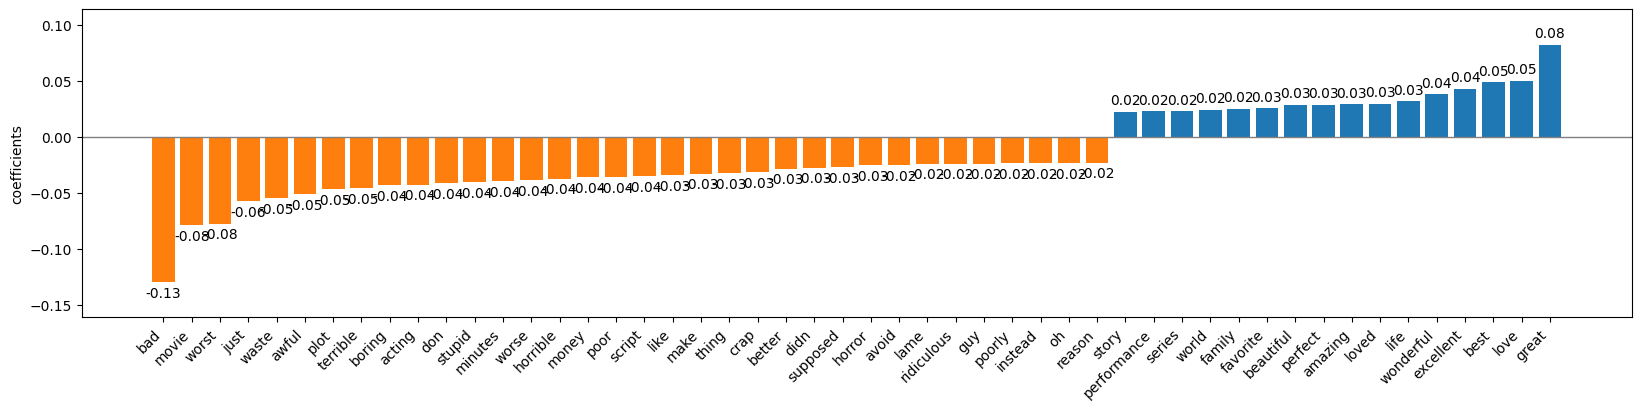

In [32]:
coefs = model.coef_.ravel()
top_idxs = np.abs(coefs).argsort()[-50:]

top_ceofs = coefs[top_idxs]
top_names = feature_names[top_idxs]

label_idxs = top_ceofs.argsort()

plt.figure(figsize=(20, 4))
plot_coefficients(top_ceofs[label_idxs], labels=top_names[label_idxs])

##  n-grams分词

In [33]:
bards_words = [
    'The fool doth think he is wise', 
    'but the wise man knows himself to be a fool'
]

cv1 = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)

print(cv1.get_feature_names_out())

print(cv1.transform(bards_words).toarray())

['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [34]:
cv2 = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)

print(cv2.get_feature_names_out())

print(cv2.transform(bards_words).toarray())

['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [35]:
cv3 = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)

print(cv3.get_feature_names_out())

print(cv3.transform(bards_words).toarray())

['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']
[[0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0
  1 0 0]
 [1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1
  1 1 1]]


In [36]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 3), norm='l2')
X_train = vectorizer.fit_transform(text_train)
X_test =  vectorizer.transform(text_test)

model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

print("Training F1-score:", f1_score(y_train, model.predict(X_train)))
print("Testingg F1-score:", f1_score(y_test, model.predict(X_test)))

Training F1-score: 0.8818953323903819
Testingg F1-score: 0.8516674569306149
CPU times: total: 20.7 s
Wall time: 22.2 s


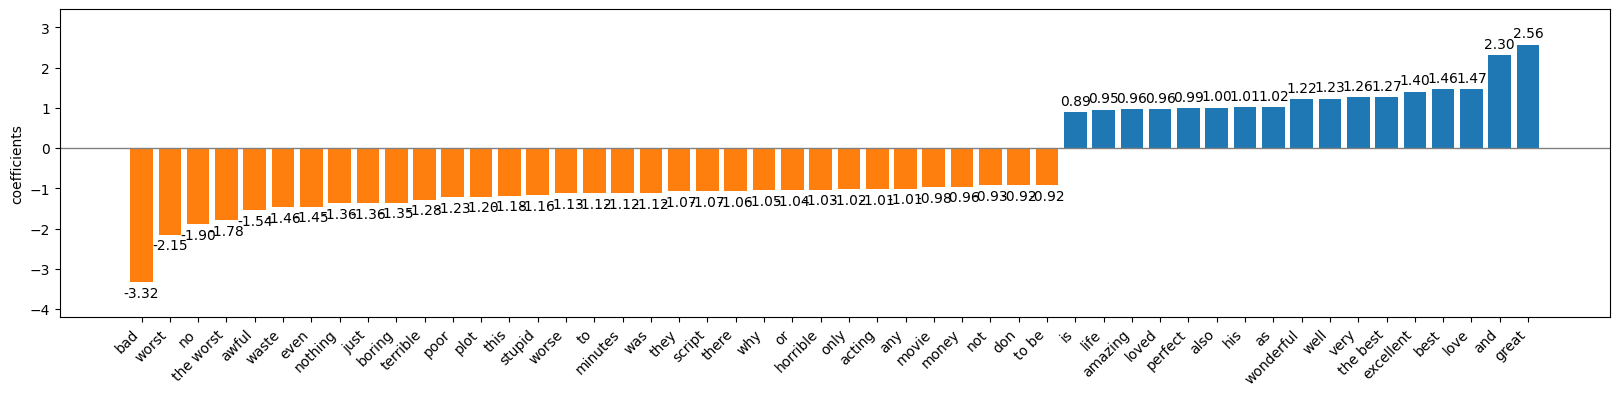

In [37]:
coefs = model.coef_.ravel()
feature_names = vectorizer.get_feature_names_out()
top_idxs = np.abs(coefs).argsort()[-50:]

top_ceofs = coefs[top_idxs]
top_names = feature_names[top_idxs]

label_idxs = top_ceofs.argsort()

plt.figure(figsize=(20, 4))
plot_coefficients(top_ceofs[label_idxs], labels=top_names[label_idxs])

分析模型中二元特征（由两个单词组成的短语）的系数

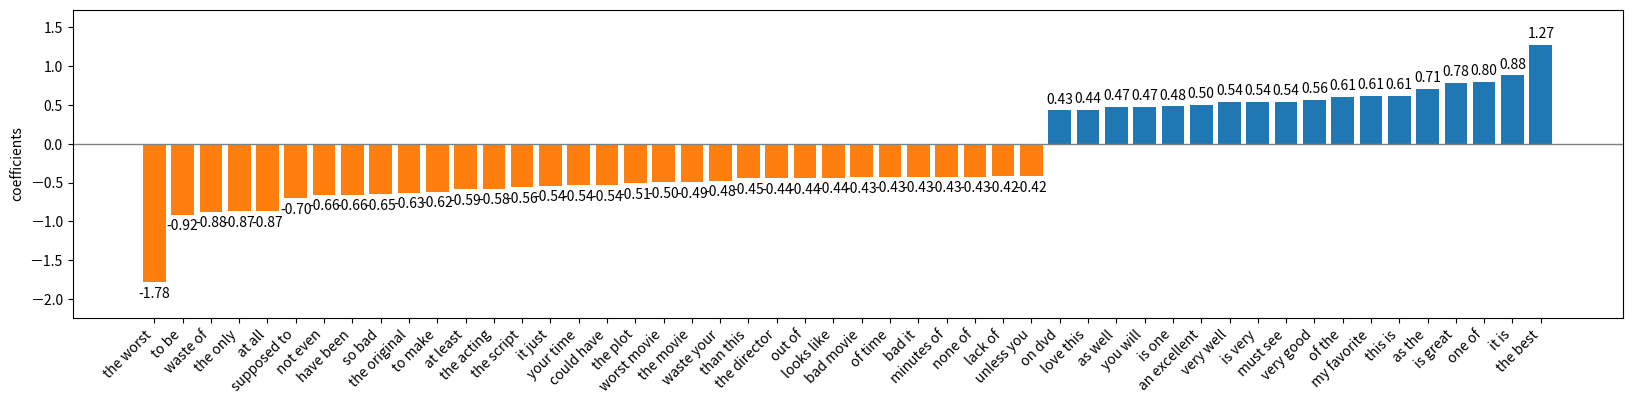

In [118]:
feature_names = vectorizer.get_feature_names_out()
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

coefs = model.coef_.ravel()[mask]
feature_names = feature_names[mask]
top_idxs = np.abs(coefs).argsort()[-50:]

top_ceofs = coefs[top_idxs]
top_names = feature_names[top_idxs]

label_idxs = top_ceofs.argsort()

plt.figure(figsize=(20, 4))
plot_coefficients(top_ceofs[label_idxs], labels=top_names[label_idxs])

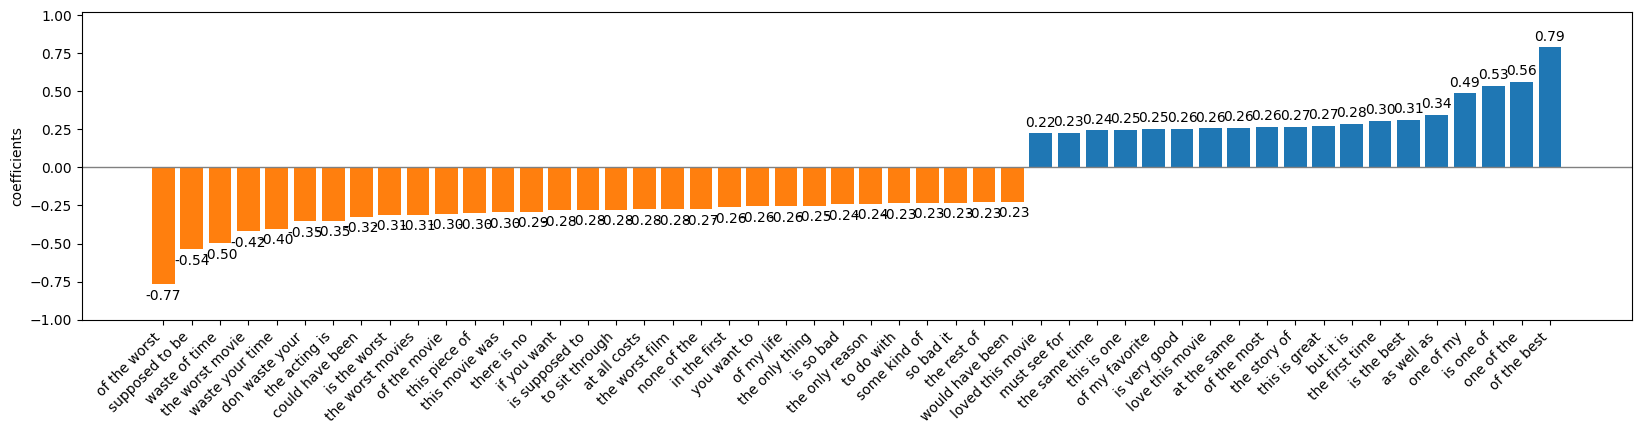

In [38]:
feature_names = vectorizer.get_feature_names_out()
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3

coefs = model.coef_.ravel()[mask]
feature_names = feature_names[mask]
top_idxs = np.abs(coefs).argsort()[-50:]

top_ceofs = coefs[top_idxs]
top_names = feature_names[top_idxs]

label_idxs = top_ceofs.argsort()

plt.figure(figsize=(20, 4))
plot_coefficients(top_ceofs[label_idxs], labels=top_names[label_idxs])